Thierry Isaac N'kouka


10180100202


## Instructions:

This notebook  would provide details on your mid semester project. Carefully read and follow all instructions needed to complete the project. The project deadline is Tuesday, **10th November, 2020**.

**How to Submit:** Your final project should include a jupyter notebook that should be compiled with **no errors !**.  Also, include a well written report that will detail your findings from the project as well as lessons learnt. Both notebook and report should be pushed to your github pages and link shared with deborah.kanubala@acity.edu.gh and copy kwesi.cobbina@acity.edu.gh. Please do not forget to include a README.md to your repository.  


**Data and Task:** The data you would be working with is the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) and the goal is to build a robust regression model to predict house prices and use the mean squared error as an evaluation metric. I have already loaded the data and put it in a dataframe for your use.








++++++++++++++++++++++++++## To Do:

Most importantly, your notebook should include your linear regression model and evaluation metric. However, you can follow the steps in carrying out your  machine learning project

1. Clean data by identifying if there are any missing values, outliers or need for standardization.

2. Carry out basic exploratory analysis by plotting bar plots, histograms, pie charts etc depending on your preference and data type.

3. Split the data into train and test by using 25% of the data for testing and the remaining data for training the model.


4. Evaluate the performance of your model using MSE.


5. Push your notebook and final report to github.


### Commit to Github:

- Create a github repository for your project from your github account

- Clone the repo directly into your local system

- Create your notebook and everything else you need to work with in the same location where you cloned your repo.

- Do all your work and once is done use these to commit to github:

        * git add .
        * git commit -m "some text here"
        * git push
        






#####  I wish you the best of luck and you can always write to me or Kwesi if you have any questions

In [239]:
import pandas as pd # import pandas for dataframes
from sklearn.datasets import load_boston # import data from sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
boston = load_boston() 
df = pd.DataFrame(boston.data)
df.columns= boston.feature_names
df['price']= boston.target


## Boston Data set description

In [240]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [241]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [242]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Rows and Columns

In [243]:
df.shape

(506, 14)

In [244]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing

### Identifying Null Values

In [245]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [246]:
import numpy as np

### Identifying Outliers and removing them

In [247]:
outliers = []
#def detect_outliers(list):
 #   thirdstdval = 3
  #  mean = np.mean(list)
   # std = np.std(list)
    #for item in list:
     #   z_score = (item - mean)/std
      #  if np.abs(z_score)>thirdstdval:
       #     outliers.append(item)
    #return outliers
    
#detect_outliers(df)
#col = df.columns 
#for i in col:
 #   print (detect_outliers(df[i]))

In [248]:
from scipy import stats
Z_score = np.abs(stats.zscore(df))


In [249]:
df = pd.DataFrame( df[(Z_score<3).all(axis=1)])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [264]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


### Exploratory Analysis 

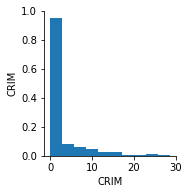

In [266]:
import seaborn as sns
CRIM = pd.DataFrame(df['CRIM'])
sns.pairplot(CRIM)

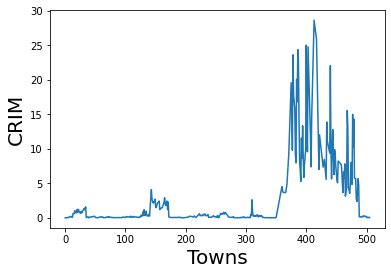

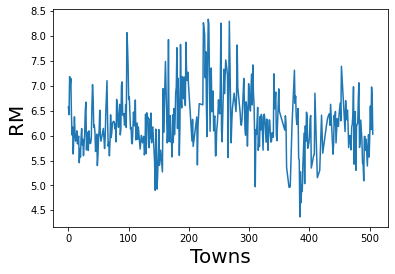

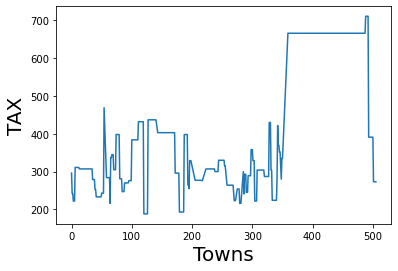

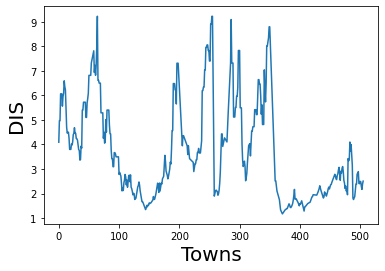

In [269]:
col_list = ['CRIM' , 'RM','TAX','DIS']
for i in col_list:
        plt.plot(df[i],linestyle="solid")
        plt.ylabel(i, fontsize = 20)
        plt.xlabel("Towns", fontsize=20)
        plt.show()

### Splitting the data

In [252]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['price']

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 49)

In [255]:
print("shape of xtrain:", X_train.shape)
print("shape of ytrain:", y_train.shape)
print("shape of xtest:", X_test.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (311, 13)
shape of ytrain: (311,)
shape of xtest: (104, 13)
shape of ytest: (104,)


### Training the model

In [256]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Evaluation

In [257]:
print(lm.intercept_)

26.738249445423317


In [258]:
lm.coef_

array([-1.79571435e-01,  2.87176079e-03,  5.28307284e-02,  1.19806942e-13,
       -1.18203873e+01,  5.25217663e+00, -2.61881624e-02, -1.23764830e+00,
        2.66071286e-01, -1.36626212e-02, -9.45544234e-01,  4.55344528e-03,
       -4.53390687e-01])

In [259]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-1.795714e-01
ZN,2.871761e-03
INDUS,5.283073e-02
CHAS,1.198069e-13
NOX,-1.182039e+01
RM,5.252177e+00
AGE,-2.618816e-02
DIS,-1.237648e+00
RAD,2.660713e-01
TAX,-1.366262e-02


In [260]:
predictions = lm.predict(X_test)

### Mean Scared Error

In [261]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 16.785950616140024


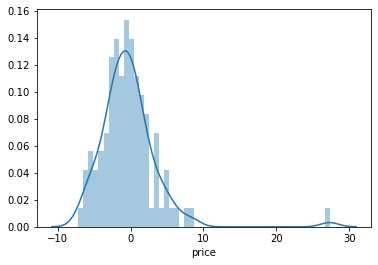

In [265]:
sns.distplot((y_test-predictions),bins=50);

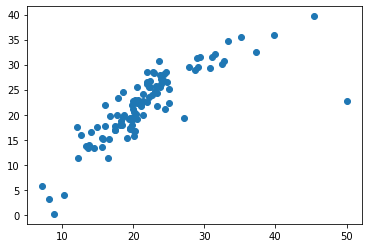

In [262]:
plt.scatter(y_test,predictions)